In [4]:
import numpy as np
import matplotlib.pyplot as plt

from aeons.covariance import X_mu, X_Sigmainv
from aeons.true_distribution import generate_Xs, nk_dead, nk_dead_live, nk_live
from aeons.likelihoods import linear, simple, middle, full
from models import LS, CG

In [7]:
nk = nk_dead_live(nlive=500, ndead=500)
mean = X_mu(nk)
covinv = X_Sigmainv(nk)

In [133]:
X = generate_Xs(nk)
theta_true = 10
like = simple
y = like.func(X, theta_true)
ls = LS(y, like, mean)
ls_f = LS(y[2:7], like, mean[2:7])

In [134]:
theta_l = ls.minimise(theta_true)
theta_lf = ls_f.minimise(theta_true)
theta_l, theta_lf

(array([10.50427246]), array([9.51702881]))

In [136]:
ls.logZ(theta_l), ls_f.logZ(theta_lf)

(2720.000063337731, 20.099156328162156)

In [153]:
def logPr_ls_flagged(y, likelihood, mean, theta, width):
    N = len(y)
    start = np.random.randint(0, N-width)
    y_f = y[start:start+width]
    mean_f = mean[start:start+width]
ls.logPr(theta_l), ls_f.logPr(theta_lf)
    loss = mean_f - likelihood.inverse(y_f, theta)
    L_sq = np.sum(loss**2)

### **Cauchy bandwidth**

In [155]:
def cauchy(X, theta=1):
    return np.log(theta/(theta**2 + X**2))

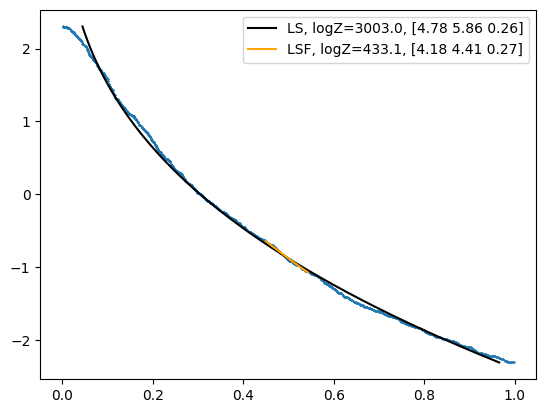

In [365]:
X = generate_Xs(nk)
y = cauchy(X, 0.1)
ls = LS(y, full, mean_X)
start, end = 300, 1000
lsf = LS(y[start:end], full, mean_X[start:end])

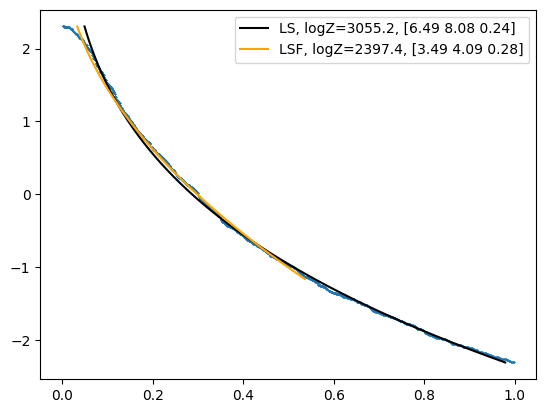

In [371]:
theta_l = ls.minimise([5, 10, 0.1])
theta_lf = lsf.minimise([3, 12, 0.1])
# plt.plot(X, y, 'x', ms=1)
plt.plot(mean_X, y, 'x', ms=1)
plt.plot(full.inverse(y, theta_l), y, color='black', ms=1, label=f'LS, logZ={ls.logZ(theta_l):.1f}, {np.round(theta_l, 2)}')
plt.plot(full.inverse(y[start:end], theta_lf), y[start:end], color='orange', ms=1, label=f'LSF, logZ={lsf.logZ(theta_lf):.1f}, {np.round(theta_lf, 2)}')
plt.legend()
# plt.xlim(0.3, 0.7)
# plt.ylim(-1.5, 0)